載入數據集

In [1]:
import pandas as pd
import numpy as np

# 替換以下路徑和文件名為您的數據集路徑和文件名
banana_data_path = 'banana_(with_class_label).csv'
sizes3_data_path = 'sizes3_(with_class_label).csv'

# 載入數據集
banana_data = pd.read_csv(banana_data_path)
sizes3_data = pd.read_csv(sizes3_data_path)

# 顯示數據集的前幾行，以確認數據載入正確
print(banana_data.head())
print(sizes3_data.head())


       x      y  class
0  0.228  0.559      1
1  0.216  0.528      1
2  0.221  0.552      1
3  0.215  0.538      1
4  0.224  0.548      1
          x         y  class
0   9.28531  14.58790      0
1  12.39770   8.44890      0
2   8.73624  11.68030      0
3   9.10197  12.83270      0
4  12.29480   8.67373      0


前處理

In [2]:
# 檢查缺失值
print("Banana Dataset Missing Values:\n", banana_data.isnull().sum())
print("\nSizes3 Dataset Missing Values:\n", sizes3_data.isnull().sum())

# 檢查數據類型
print("\nBanana Dataset Data Types:\n", banana_data.dtypes)
print("\nSizes3 Dataset Data Types:\n", sizes3_data.dtypes)

# 分離特徵和類別標籤
banana_features = banana_data.drop('class', axis=1)
banana_labels = banana_data['class']

sizes3_features = sizes3_data.drop('class', axis=1)
sizes3_labels = sizes3_data['class']


Banana Dataset Missing Values:
 x        0
y        0
class    0
dtype: int64

Sizes3 Dataset Missing Values:
 x        0
y        0
class    0
dtype: int64

Banana Dataset Data Types:
 x        float64
y        float64
class      int64
dtype: object

Sizes3 Dataset Data Types:
 x        float64
y        float64
class      int64
dtype: object


Banana 顯示

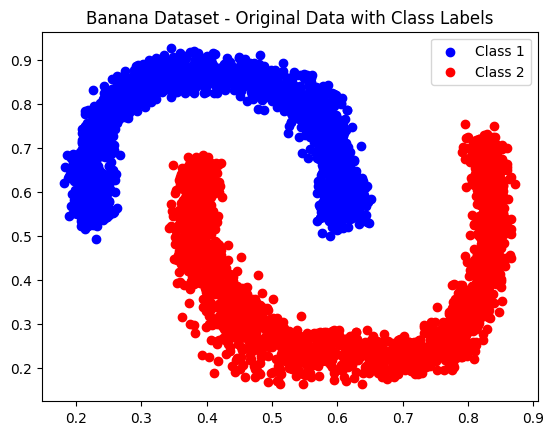

In [3]:
import matplotlib.pyplot as plt

# 繪製原始數據集，並為不同類別標籤設置不同顏色
banana_class_1 = banana_features[banana_labels == 1]
banana_class_2 = banana_features[banana_labels == 2]

plt.scatter(banana_class_1['x'], banana_class_1['y'], color='blue', label='Class 1', marker='o')
plt.scatter(banana_class_2['x'], banana_class_2['y'], color='red', label='Class 2', marker='o')

plt.title('Banana Dataset - Original Data with Class Labels')
plt.legend()
plt.show()


Banana - K-means 分群

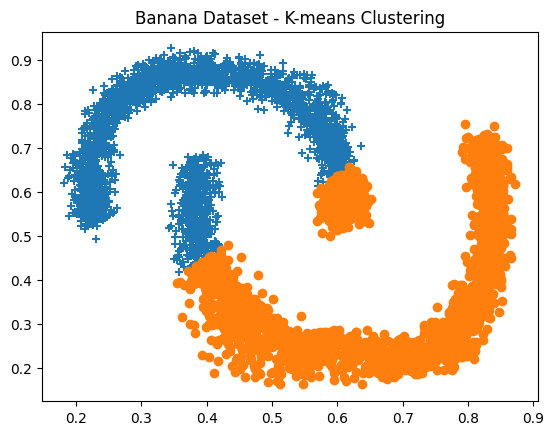

K-means Time: 0.13199996948242188 seconds
K-means SSE: 185.20249172852806
Aligned K-means Accuracy: 0.8285179796300145
K-means Entropy: 0.4555792295911876


In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, silhouette_score
from scipy.stats import entropy
from math import log
import matplotlib.pyplot as plt
import time
import numpy as np

# 定義計算Entropy的函數
def calculate_entropy(labels, clusters):
    cm = confusion_matrix(labels, clusters)
    entropies = []
    for i in range(cm.shape[0]):
        row_entropy = 0
        row_sum = sum(cm[i, :])
        for count in cm[i, :]:
            if count > 0:
                row_entropy -= (count / row_sum) * log(count / row_sum)
        entropies.append(row_entropy)
    return sum(entropies) / len(entropies)

def align_labels(true_labels, predicted_labels):
    """
    Align the predicted labels with the true labels.
    """
    cm = confusion_matrix(true_labels, predicted_labels)
    row_indices = np.argmax(cm, axis=1)
    aligned_labels = np.zeros_like(predicted_labels)
    for i, r in enumerate(row_indices):
        aligned_labels[predicted_labels == r] = i
    return aligned_labels

def calculate_total_sse(aligned_labels, features):
    """
    Calculate the total Sum of Squared Errors (SSE) for all clusters.

    Parameters:
    aligned_labels (array): Cluster labels for each data point.
    features (array): Data points.

    Returns:
    float: The total SSE value for all clusters.
    """
    import numpy as np

    # Initialize total SSE
    total_sse_point = 0
    total_sse = 0

    # Calculate centroids and SSE for each cluster
    unique_labels = np.unique(aligned_labels)
    for label in unique_labels:
        # Exclude noise points
        if label != -1:
            # Extract points belonging to the current cluster
            points = features[aligned_labels == label]

            # Calculate centroid
            centroid = np.mean(points, axis=0)

            # Add to total SSE
            total_sse_point += np.sum(np.square(points - centroid))

    for single_sse in total_sse_point:
        total_sse += single_sse

    return total_sse

# K-means 分群
start_time = time.time()
kmeans = KMeans(n_clusters=2, n_init=10, random_state=0).fit(banana_features)
end_time = time.time()

# 對齊K-means標籤與原始標籤
aligned_kmeans_labels = align_labels(banana_labels, kmeans.labels_)

# 計算效能指標
kmeans_time = end_time - start_time
kmeans_sse = kmeans.inertia_
kmeans_accuracy = accuracy_score(banana_labels, aligned_kmeans_labels)
kmeans_entropy = calculate_entropy(banana_labels, aligned_kmeans_labels)

# 繪製分群結果
for i in range(2):
    subset = banana_features[kmeans.labels_ == i]
    plt.scatter(subset['x'], subset['y'], marker='+' if i == 0 else 'o')
plt.title('Banana Dataset - K-means Clustering')
plt.show()

# 顯示計算結果
print(f"K-means Time: {kmeans_time} seconds")
print(f"K-means SSE: {kmeans_sse}")
print(f"Aligned K-means Accuracy: {kmeans_accuracy}")  # 這裡顯示對齊後的準確率
print(f"K-means Entropy: {kmeans_entropy}")


Banana - 階層式分群

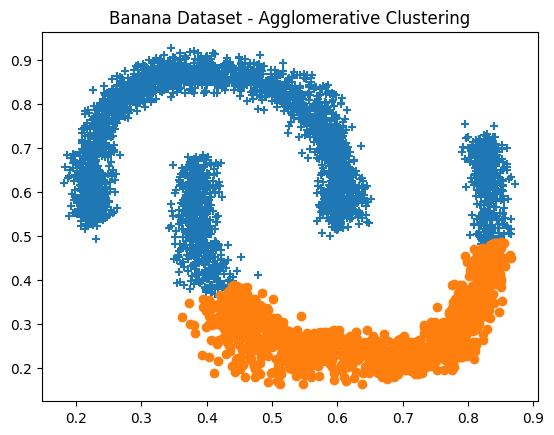

Agglomerative Clustering Time: 0.3519937992095947 seconds
Agglomerative Clustering SSE: 222.5898033728556
Agglomerative Clustering Accuracy: 0.7865308667636666
Agglomerative Clustering Entropy: 0.34389341149605634


In [5]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import time

# 階層式分群
start_time = time.time()
agg_clustering = AgglomerativeClustering(n_clusters=2).fit(banana_features)
agg_labels = agg_clustering.labels_
end_time = time.time()

# 對齊agg標籤與原始標籤
aligned_agg_labels = align_labels(banana_labels, agg_clustering.labels_)

# 計算效能指標
agg_time = end_time - start_time
agg_sse = calculate_total_sse(aligned_agg_labels,banana_features)
agg_accuracy = accuracy_score(banana_labels, aligned_agg_labels)
agg_entropy = calculate_entropy(banana_labels, aligned_agg_labels)

# 繪製分群結果
for i in range(2):
    subset = banana_features[agg_labels == i]
    plt.scatter(subset['x'], subset['y'], marker='+' if i == 0 else 'o')
plt.title('Banana Dataset - Agglomerative Clustering')
plt.show()

# 顯示計算結果
print(f"Agglomerative Clustering Time: {agg_time} seconds")
print(f"Agglomerative Clustering SSE: {agg_sse}")
print(f"Agglomerative Clustering Accuracy: {agg_accuracy}")
print(f"Agglomerative Clustering Entropy: {agg_entropy}")


Banana - DBSCAN

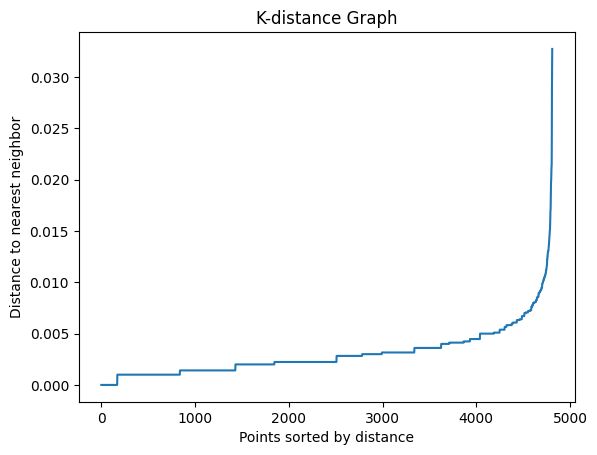

In [6]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# 計算每個點到最近鄰居的距離
nearest_neighbors = NearestNeighbors(n_neighbors=2).fit(banana_features)
distances, indices = nearest_neighbors.kneighbors(banana_features)
distances = np.sort(distances, axis=0)
distances = distances[:, 1]

# 繪製距離圖來幫助選擇eps
plt.plot(distances)
plt.title('K-distance Graph')
plt.xlabel('Points sorted by distance')
plt.ylabel('Distance to nearest neighbor')
plt.show()


粗略查找 eps 和 min_samples 的最佳組合和準確率

In [28]:
# eps和min_samples的最佳組合和準確率
from sklearn.cluster import DBSCAN

eps_values = np.arange(0.005, 0.1, 0.005)
min_samples_values = np.arange(1, 10)
best_accuracy = 0
best_params = {'eps': 0, 'min_samples': 0}

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(banana_features)
        aligned_labels = align_labels(banana_labels, dbscan.labels_)
        accuracy = accuracy_score(banana_labels, aligned_labels)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params['eps'] = eps
            best_params['min_samples'] = min_samples

# 顯示最佳組合和準確率
print(f"Best Accuracy: {best_accuracy}")
print(f"Best Parameters: eps={best_params['eps']}, min_samples={best_params['min_samples']}")


Best Accuracy: 1.0
Best Parameters: eps=0.034999999999999996, min_samples=1


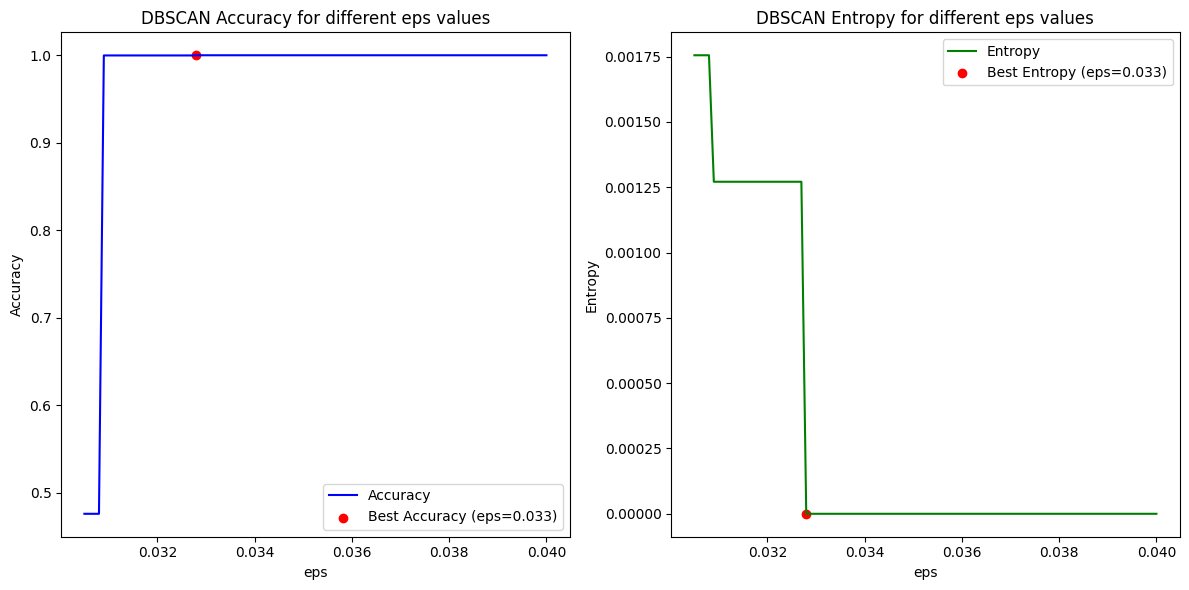

In [35]:
# 測試不同的eps值
eps_values = np.arange(0.0305, 0.0400, 0.0001)
init_banana_min_samples = 1

accuracies = []
entropies = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=init_banana_min_samples).fit(banana_features)
    aligned_labels = align_labels(banana_labels, dbscan.labels_)
    accuracy = accuracy_score(banana_labels, aligned_labels)
    entropy = calculate_entropy(banana_labels, aligned_labels)

    accuracies.append(accuracy)
    entropies.append(entropy)

# 找出最佳的Accuracy和Entropy
best_accuracy_index = np.argmax(accuracies)
best_entropy_index = np.argmin(entropies)
best_accuracy_eps = eps_values[best_accuracy_index]
best_entropy_eps = eps_values[best_entropy_index]

best_accuracy = accuracies[best_accuracy_index]
best_entropy = entropies[best_entropy_index]

# 繪製結果
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(eps_values, accuracies, label='Accuracy', color='blue')
plt.scatter(best_accuracy_eps, best_accuracy, color='red', label=f'Best Accuracy (eps={best_accuracy_eps:.3f})')
plt.title('DBSCAN Accuracy for different eps values')
plt.xlabel('eps')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(eps_values, entropies, label='Entropy', color='green')
plt.scatter(best_entropy_eps, best_entropy, color='red', label=f'Best Entropy (eps={best_entropy_eps:.3f})')
plt.title('DBSCAN Entropy for different eps values')
plt.xlabel('eps')
plt.ylabel('Entropy')
plt.legend()

plt.tight_layout()
plt.show()

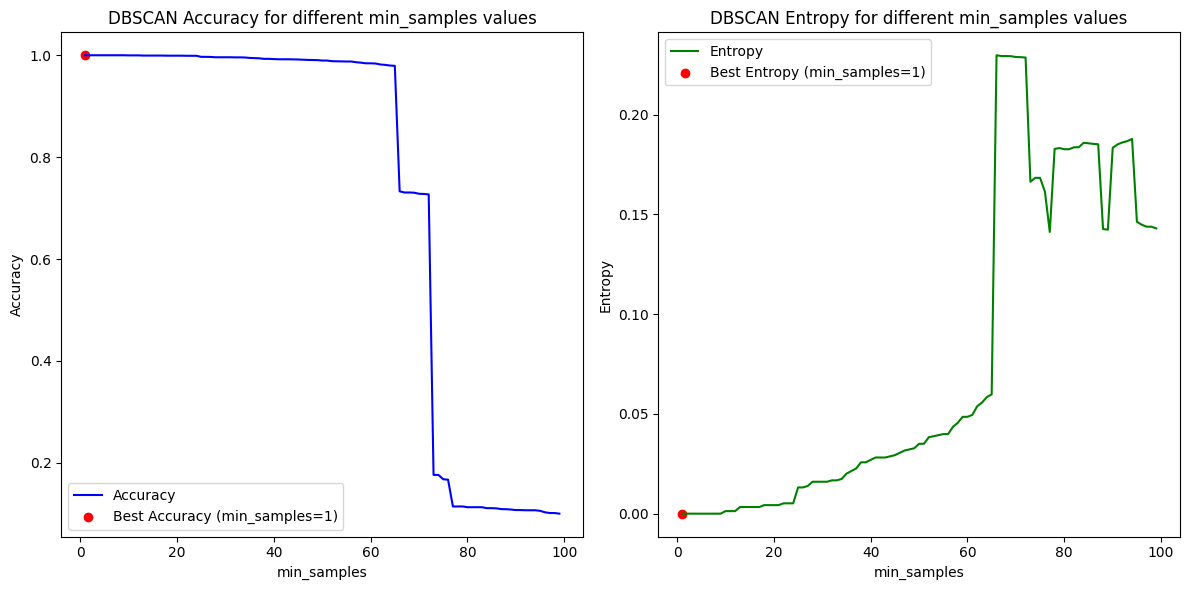

In [8]:
# 測試不同的min_samples值
min_samples_values = np.arange(1, 100, 1)
init_banana_eps = 0.033

accuracies = []
entropies = []

for min_samples in min_samples_values:
    dbscan = DBSCAN(eps=init_banana_eps, min_samples=min_samples).fit(banana_features)
    aligned_labels = align_labels(banana_labels, dbscan.labels_)
    accuracy = accuracy_score(banana_labels, aligned_labels)
    entropy = calculate_entropy(banana_labels, aligned_labels)

    accuracies.append(accuracy)
    entropies.append(entropy)

# 找出最佳的Accuracy和Entropy
best_accuracy_index = np.argmax(accuracies)
best_entropy_index = np.argmin(entropies)
best_accuracy_min_samples = min_samples_values[best_accuracy_index]
best_entropy_min_samples = min_samples_values[best_entropy_index]

best_accuracy = accuracies[best_accuracy_index]
best_entropy = entropies[best_entropy_index]

# 繪製結果
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(min_samples_values, accuracies, label='Accuracy', color='blue')
plt.scatter(best_accuracy_min_samples, best_accuracy, color='red', label=f'Best Accuracy (min_samples={best_accuracy_min_samples:.0f})')
plt.title('DBSCAN Accuracy for different min_samples values')
plt.xlabel('min_samples')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(min_samples_values, entropies, label='Entropy', color='green')
plt.scatter(best_entropy_min_samples, best_entropy, color='red', label=f'Best Entropy (min_samples={best_entropy_min_samples:.0f})')
plt.title('DBSCAN Entropy for different min_samples values')
plt.xlabel('min_samples')
plt.ylabel('Entropy')
plt.legend()

plt.tight_layout()
plt.show()

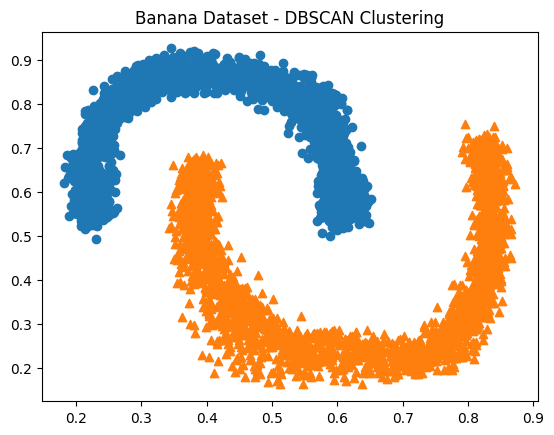

DBSCAN Clustering Time (Banana): 0.055001020431518555 seconds
DBSCAN Clustering SSE (Banana): 227.11916590178612
DBSCAN Clustering Accuracy (Banana): 1.0
DBSCAN Clustering Entropy (Banana): 0.0


In [30]:
# DBSCAN 分群 (Banana Dataset)
start_time = time.time()
# min_samples => [1, inf)
dbscan_banana = DBSCAN(eps=0.036, min_samples=1).fit(banana_features)
dbscan_banana_labels = dbscan_banana.labels_
end_time = time.time()

# 對齊 DBSCAN 標籤與原始標籤 (Banana Dataset)
aligned_dbscan_banana_labels = align_labels(banana_labels, dbscan_banana.labels_)

# 計算執行時間和各種評估指標 (Banana Dataset)
dbscan_banana_time = end_time - start_time
dbscan_banana_sse = calculate_total_sse(aligned_dbscan_banana_labels, banana_features)
dbscan_banana_accuracy = accuracy_score(banana_labels, aligned_dbscan_banana_labels)
dbscan_banana_entropy = calculate_entropy(banana_labels, aligned_dbscan_banana_labels)

# 繪製分群結果 (Banana Dataset)
# 定義不同的標記符號
markers = ['o', '^', 's', 'p']  # 分別代表圓形、三角形、方形、五角形

for i in range(2):  # Banana數據集可能只有兩類
    subset = banana_features[dbscan_banana.labels_ == i]
    plt.scatter(subset['x'], subset['y'], marker=markers[i % len(markers)])

plt.title('Banana Dataset - DBSCAN Clustering')
plt.show()

# 顯示計算結果
print(f"DBSCAN Clustering Time (Banana): {dbscan_banana_time} seconds")
print(f"DBSCAN Clustering SSE (Banana): {dbscan_banana_sse}")
print(f"DBSCAN Clustering Accuracy (Banana): {dbscan_banana_accuracy}")
print(f"DBSCAN Clustering Entropy (Banana): {dbscan_banana_entropy}")


Banana - Result

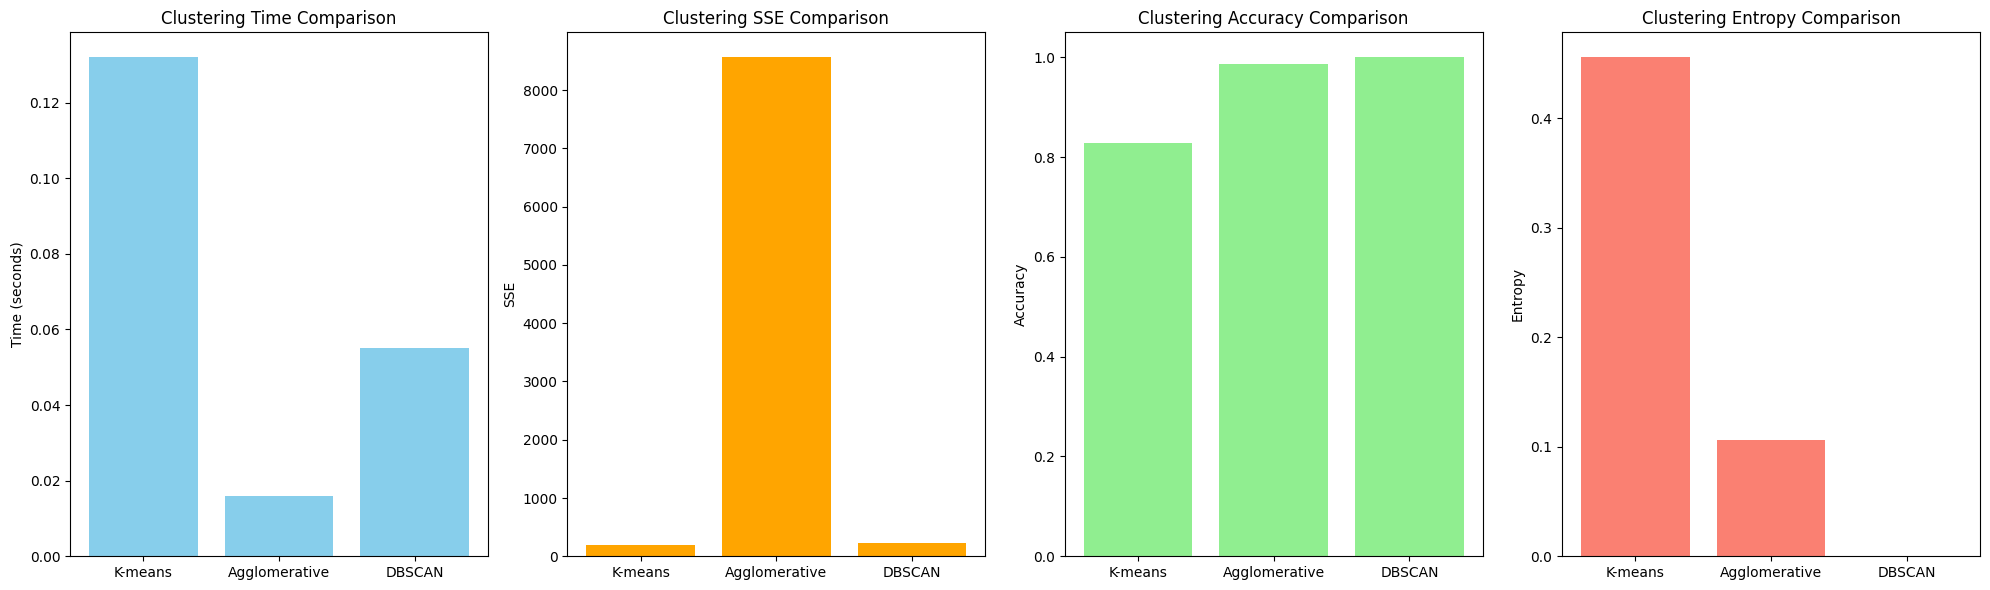

In [32]:
# 時間、準確率和熵的數據
times = [kmeans_time, agg_time, dbscan_banana_time]
SSEs = [kmeans_sse, agg_sse, dbscan_banana_sse]
accuracies = [kmeans_accuracy, agg_accuracy, dbscan_banana_accuracy]
entropies = [kmeans_entropy, agg_entropy, dbscan_banana_entropy]

# 標籤
labels = ['K-means', 'Agglomerative', 'DBSCAN']

# 繪製比較圖
plt.figure(figsize=(20, 6))

# 繪製時間比較
plt.subplot(1, 4, 1)
plt.bar(labels, times, color='skyblue')
plt.ylabel('Time (seconds)')
plt.title('Clustering Time Comparison')

# 繪製SSE比較
plt.subplot(1, 4, 2)
plt.bar(labels, SSEs, color='orange')
plt.ylabel('SSE')
plt.title('Clustering SSE Comparison')

# 繪製準確率比較
plt.subplot(1, 4, 3)
plt.bar(labels, accuracies, color='lightgreen')
plt.ylabel('Accuracy')
plt.title('Clustering Accuracy Comparison')

# 繪製熵比較
plt.subplot(1, 4, 4)
plt.bar(labels, entropies, color='salmon')
plt.ylabel('Entropy')
plt.title('Clustering Entropy Comparison')

plt.tight_layout()
plt.show()


Plot sizes3 dataset

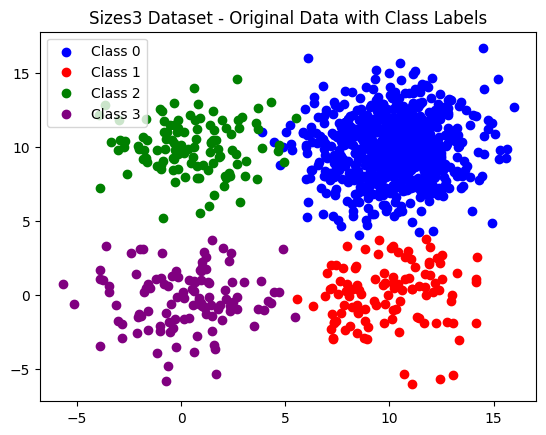

In [11]:
import matplotlib.pyplot as plt

# 分別為sizes3數據集中的每個類別設置不同顏色
sizes3_class_0 = sizes3_features[sizes3_labels == 0]
sizes3_class_1 = sizes3_features[sizes3_labels == 1]
sizes3_class_2 = sizes3_features[sizes3_labels == 2]
sizes3_class_3 = sizes3_features[sizes3_labels == 3]

plt.scatter(sizes3_class_0['x'], sizes3_class_0['y'], color='blue', label='Class 0', marker='o')
plt.scatter(sizes3_class_1['x'], sizes3_class_1['y'], color='red', label='Class 1', marker='o')
plt.scatter(sizes3_class_2['x'], sizes3_class_2['y'], color='green', label='Class 2', marker='o')
plt.scatter(sizes3_class_3['x'], sizes3_class_3['y'], color='purple', label='Class 3', marker='o')

plt.title('Sizes3 Dataset - Original Data with Class Labels')
plt.legend()
plt.show()

sizes3 - K-means

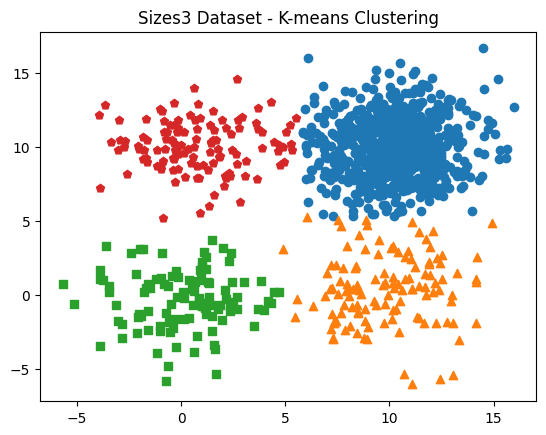

K-means (Sizes3) Time: 0.03299999237060547 seconds
K-means (Sizes3) SSE: 8341.253299448483
Aligned K-means (Sizes3) Accuracy: 0.98
K-means (Sizes3) Entropy: 0.05821656638762678


In [12]:
# K-means 分群
start_time = time.time()
kmeans_sizes3 = KMeans(n_clusters=4, n_init=10, random_state=0).fit(sizes3_features)
kmeans_sizes3_labels = kmeans_sizes3.labels_
end_time = time.time()

# K-means分群 (Sizes3)
start_time = time.time()
kmeans_sizes3 = KMeans(n_clusters=4, n_init=10, random_state=0).fit(sizes3_features)
end_time = time.time()

# 對齊K-means標籤與原始標籤 (Sizes3)
aligned_kmeans_sizes3_labels = align_labels(sizes3_labels, kmeans_sizes3.labels_)

# 計算效能指標 (Sizes3)
kmeans_sizes3_time = end_time - start_time
kmeans_sizes3_sse = kmeans_sizes3.inertia_
kmeans_sizes3_accuracy = accuracy_score(sizes3_labels, aligned_kmeans_sizes3_labels)
kmeans_sizes3_entropy = calculate_entropy(sizes3_labels, aligned_kmeans_sizes3_labels)

# 繪製分群結果 (Sizes3)
# 定義不同的標記符號
markers = ['o', '^', 's', 'p']  # 分別代表圓形、三角形、方形、五角形

for i in range(4):
    subset = sizes3_features[kmeans_sizes3.labels_ == i]
    plt.scatter(subset['x'], subset['y'], marker=markers[i])

plt.title('Sizes3 Dataset - K-means Clustering')
# plt.legend()
plt.show()

# 顯示計算結果 (Sizes3)
print(f"K-means (Sizes3) Time: {kmeans_sizes3_time} seconds")
print(f"K-means (Sizes3) SSE: {kmeans_sizes3_sse}")
print(f"Aligned K-means (Sizes3) Accuracy: {kmeans_sizes3_accuracy}")
print(f"K-means (Sizes3) Entropy: {kmeans_sizes3_entropy}")

sizes3 - 階層式分群

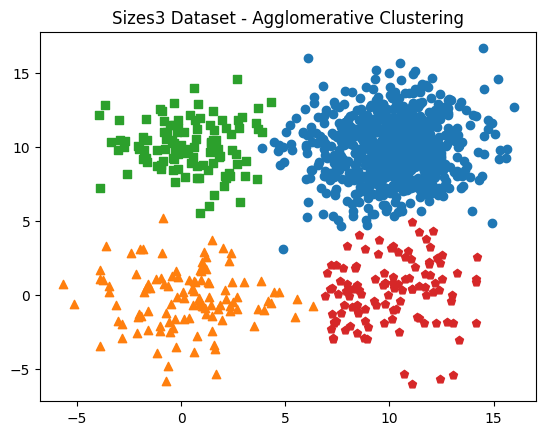

Agglomerative Clustering Time: 0.016028404235839844 seconds
Agglomerative Clustering SSE: 8562.903461221016
Agglomerative Clustering Accuracy: 0.986
Agglomerative Clustering Entropy: 0.10603939407129732


In [13]:
# 階層式分群
start_time = time.time()
agg_clustering_sizes3 = AgglomerativeClustering(n_clusters=4).fit(sizes3_features)
agg_labels_sizes3 = agg_clustering_sizes3.labels_
end_time = time.time()

# 對齊agg標籤與原始標籤
aligned_agg_labels_sizes3 = align_labels(sizes3_labels, agg_clustering_sizes3.labels_)

# 計算效能指標
agg_time = end_time - start_time
agg_sse = calculate_total_sse(aligned_agg_labels_sizes3, sizes3_features)
agg_accuracy = accuracy_score(sizes3_labels, aligned_agg_labels_sizes3)
agg_entropy = calculate_entropy(sizes3_labels, aligned_agg_labels_sizes3)

# 繪製分群結果 (Sizes3 Agglomerative)
# 定義不同的標記符號
markers = ['o', '^', 's', 'p']  # 分別代表圓形、三角形、方形、五角形

for i in range(4):
    subset = sizes3_features[agg_labels_sizes3 == i]
    plt.scatter(subset['x'], subset['y'], marker=markers[i])

plt.title('Sizes3 Dataset - Agglomerative Clustering')
plt.show()

# 顯示計算結果
print(f"Agglomerative Clustering Time: {agg_time} seconds")
print(f"Agglomerative Clustering SSE: {agg_sse}")
print(f"Agglomerative Clustering Accuracy: {agg_accuracy}")
print(f"Agglomerative Clustering Entropy: {agg_entropy}")


sizes3 - DBSCAN

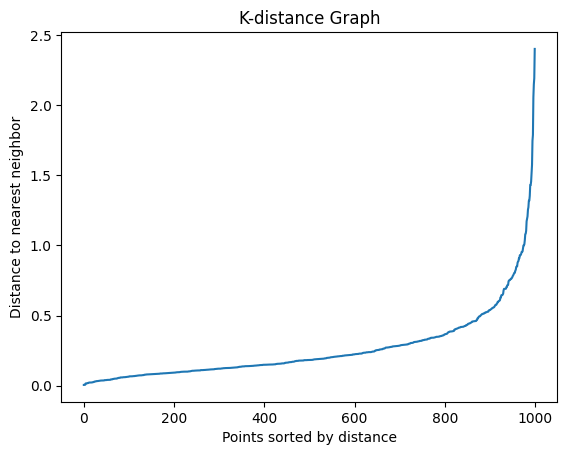

In [14]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# 計算每個點到最近鄰居的距離
nearest_neighbors = NearestNeighbors(n_neighbors=2).fit(sizes3_features)
distances, indices = nearest_neighbors.kneighbors(sizes3_features)
distances = np.sort(distances, axis=0)
distances = distances[:, 1]

# 繪製距離圖來幫助選擇eps
plt.plot(distances)
plt.title('K-distance Graph')
plt.xlabel('Points sorted by distance')
plt.ylabel('Distance to nearest neighbor')
plt.show()


粗略查找 eps 和 min_samples 的最佳組合和準確率

In [15]:
# eps和min_samples的最佳組合和準確率
eps_values = np.arange(0.1, 2.5, 0.1)
min_samples_values = np.arange(1, 101)
best_accuracy = 0
best_params = {'eps': 0, 'min_samples': 0}

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(sizes3_features)
        aligned_labels = align_labels(sizes3_labels, dbscan.labels_)
        accuracy = accuracy_score(sizes3_labels, aligned_labels)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params['eps'] = eps
            best_params['min_samples'] = min_samples

# 顯示最佳組合和準確率
print(f"Best Accuracy: {best_accuracy}")
print(f"Best Parameters: eps={best_params['eps']}, min_samples={best_params['min_samples']}")


Best Accuracy: 0.95
Best Parameters: eps=1.8000000000000003, min_samples=20


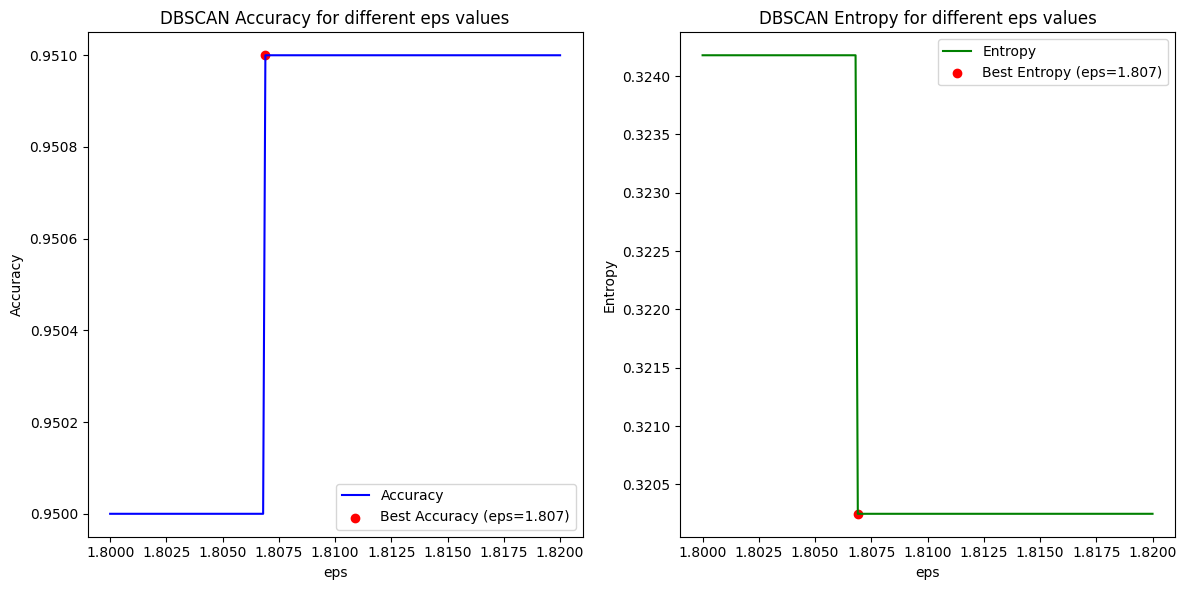

In [16]:
# 測試不同的eps值
eps_values = np.arange(1.8, 1.82, 0.0001)
init_min_samples_eps = 20
accuracies = []
entropies = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=init_min_samples_eps).fit(sizes3_features)
    aligned_labels = align_labels(sizes3_labels, dbscan.labels_)
    accuracy = accuracy_score(sizes3_labels, aligned_labels)
    entropy = calculate_entropy(sizes3_labels, aligned_labels)

    accuracies.append(accuracy)
    entropies.append(entropy)

# 找出最佳的Accuracy和Entropy
best_accuracy_index = np.argmax(accuracies)
best_entropy_index = np.argmin(entropies)
best_accuracy_eps = eps_values[best_accuracy_index]
best_entropy_eps = eps_values[best_entropy_index]

best_accuracy = accuracies[best_accuracy_index]
best_entropy = entropies[best_entropy_index]

# 繪製結果
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(eps_values, accuracies, label='Accuracy', color='blue')
plt.scatter(best_accuracy_eps, best_accuracy, color='red', label=f'Best Accuracy (eps={best_accuracy_eps:.3f})')
plt.title('DBSCAN Accuracy for different eps values')
plt.xlabel('eps')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(eps_values, entropies, label='Entropy', color='green')
plt.scatter(best_entropy_eps, best_entropy, color='red', label=f'Best Entropy (eps={best_entropy_eps:.3f})')
plt.title('DBSCAN Entropy for different eps values')
plt.xlabel('eps')
plt.ylabel('Entropy')
plt.legend()

plt.tight_layout()
plt.show()

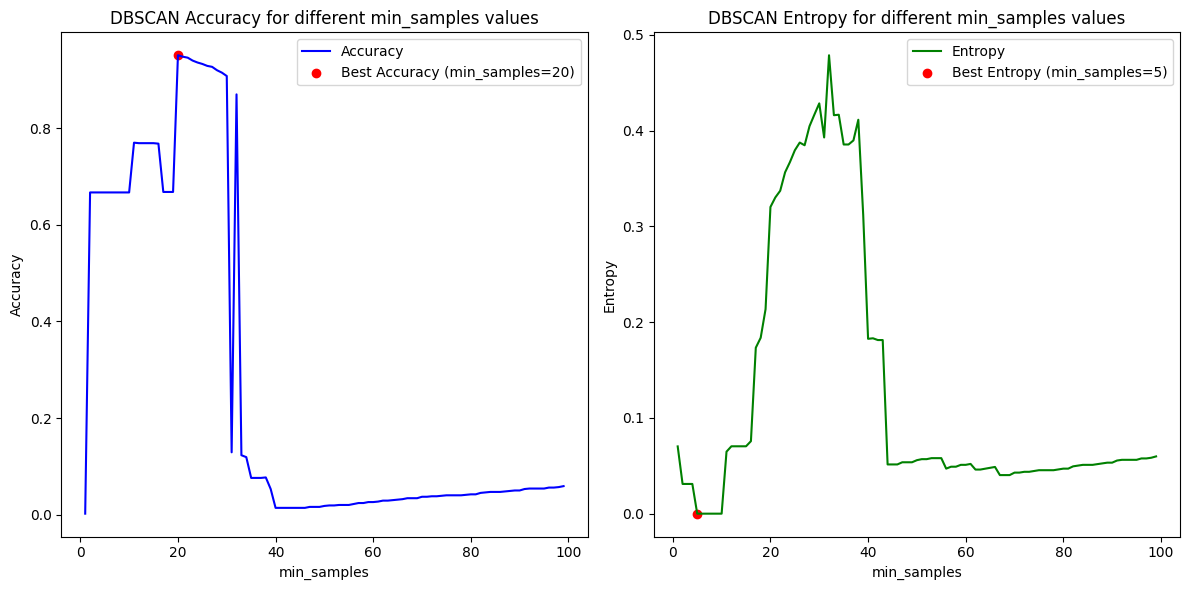

In [33]:
# 測試不同的min_samples值
min_samples_values = np.arange(1, 100, 1)
init_sizes3_eps = 1.807

accuracies = []
entropies = []

for min_samples in min_samples_values:
    dbscan = DBSCAN(eps=init_sizes3_eps, min_samples=min_samples).fit(sizes3_features)
    aligned_labels = align_labels(sizes3_labels, dbscan.labels_)
    accuracy = accuracy_score(sizes3_labels, aligned_labels)
    entropy = calculate_entropy(sizes3_labels, aligned_labels)

    accuracies.append(accuracy)
    entropies.append(entropy)

# 找出最佳的Accuracy和Entropy
best_accuracy_index = np.argmax(accuracies)
best_entropy_index = np.argmin(entropies)
best_accuracy_min_samples = min_samples_values[best_accuracy_index]
best_entropy_min_samples = min_samples_values[best_entropy_index]

best_accuracy = accuracies[best_accuracy_index]
best_entropy = entropies[best_entropy_index]

# 繪製結果
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(min_samples_values, accuracies, label='Accuracy', color='blue')
plt.scatter(best_accuracy_min_samples, best_accuracy, color='red', label=f'Best Accuracy (min_samples={best_accuracy_min_samples:.0f})')
plt.title('DBSCAN Accuracy for different min_samples values')
plt.xlabel('min_samples')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(min_samples_values, entropies, label='Entropy', color='green')
plt.scatter(best_entropy_min_samples, best_entropy, color='red', label=f'Best Entropy (min_samples={best_entropy_min_samples:.0f})')
plt.title('DBSCAN Entropy for different min_samples values')
plt.xlabel('min_samples')
plt.ylabel('Entropy')
plt.legend()

plt.tight_layout()
plt.show()

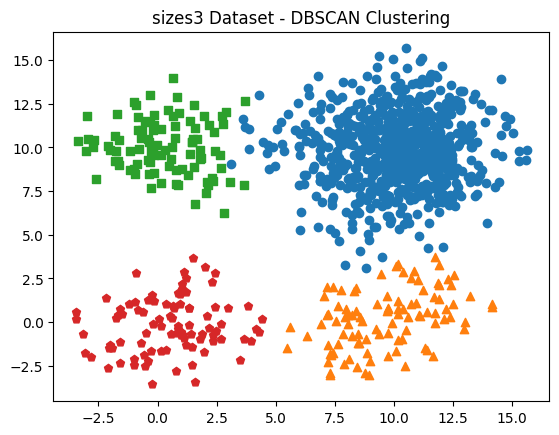

Agglomerative Clustering Time: 0.010001897811889648 seconds
Agglomerative Clustering SSE: 15487.55551166862
Agglomerative Clustering Accuracy: 0.951
Agglomerative Clustering Entropy: 0.32024802370542266


In [21]:
# DBSCAN 分群
start_time = time.time()
dbscan = DBSCAN(eps=1.807, min_samples=20).fit(sizes3_features)
dbscan_labels = dbscan.labels_
end_time = time.time()

# 對齊 DBSCAN 標籤與原始標籤
aligned_DBSCAN_labels = align_labels(sizes3_labels, dbscan.labels_)

# 計算執行時間和各種評估指標
dbscan_time = end_time - start_time
dbscan_sse = calculate_total_sse(aligned_DBSCAN_labels, sizes3_features)
dbscan_accuracy = accuracy_score(sizes3_labels, aligned_DBSCAN_labels)
dbscan_entropy = calculate_entropy(sizes3_labels, aligned_DBSCAN_labels)

# 繪製分群結果 (Sizes3 DBSCAN)
# 定義不同的標記符號
markers = ['o', '^', 's', 'p']  # 分別代表圓形、三角形、方形、五角形

for i in range(4):
    subset = sizes3_features[dbscan.labels_ == i]
    plt.scatter(subset['x'], subset['y'], marker=markers[i])

plt.title('sizes3 Dataset - DBSCAN Clustering')
plt.show()

# 顯示計算結果
print(f"Agglomerative Clustering Time: {dbscan_time} seconds")
print(f"Agglomerative Clustering SSE: {dbscan_sse}")
print(f"Agglomerative Clustering Accuracy: {dbscan_accuracy}")
print(f"Agglomerative Clustering Entropy: {dbscan_entropy}")


sizes3 Results

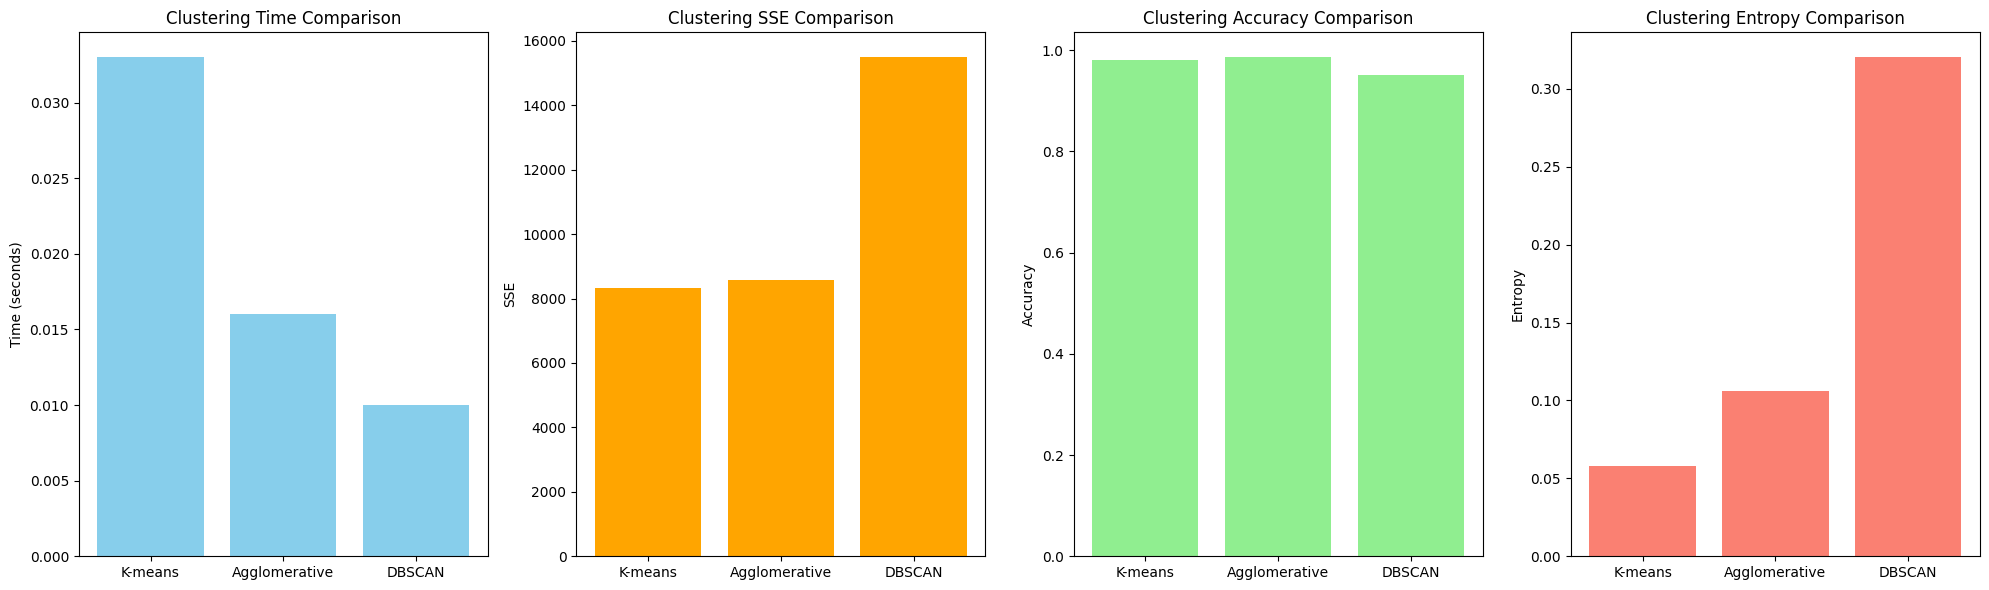

In [22]:
# 時間、準確率和熵的數據
times = [kmeans_sizes3_time, agg_time, dbscan_time]
SSEs = [kmeans_sizes3_sse, agg_sse, dbscan_sse]
accuracies = [kmeans_sizes3_accuracy, agg_accuracy, dbscan_accuracy]
entropies = [kmeans_sizes3_entropy, agg_entropy, dbscan_entropy]

# 標籤
labels = ['K-means', 'Agglomerative', 'DBSCAN']

# 繪製比較圖
plt.figure(figsize=(20, 6))

# 繪製時間比較
plt.subplot(1, 4, 1)
plt.bar(labels, times, color='skyblue')
plt.ylabel('Time (seconds)')
plt.title('Clustering Time Comparison')

# 繪製SSE比較
plt.subplot(1, 4, 2)
plt.bar(labels, SSEs, color='orange')
plt.ylabel('SSE')
plt.title('Clustering SSE Comparison')

# 繪製準確率比較
plt.subplot(1, 4, 3)
plt.bar(labels, accuracies, color='lightgreen')
plt.ylabel('Accuracy')
plt.title('Clustering Accuracy Comparison')

# 繪製熵比較
plt.subplot(1, 4, 4)
plt.bar(labels, entropies, color='salmon')
plt.ylabel('Entropy')
plt.title('Clustering Entropy Comparison')

plt.tight_layout()
plt.show()
